In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df["Price"]=boston.target
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.head(2)
df.describe()
df.corr()
df.isnull()
df.shape
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

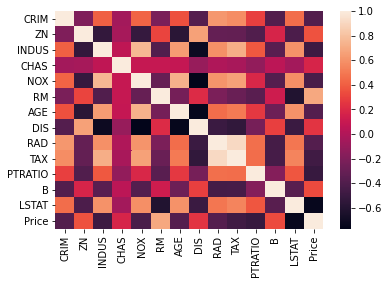

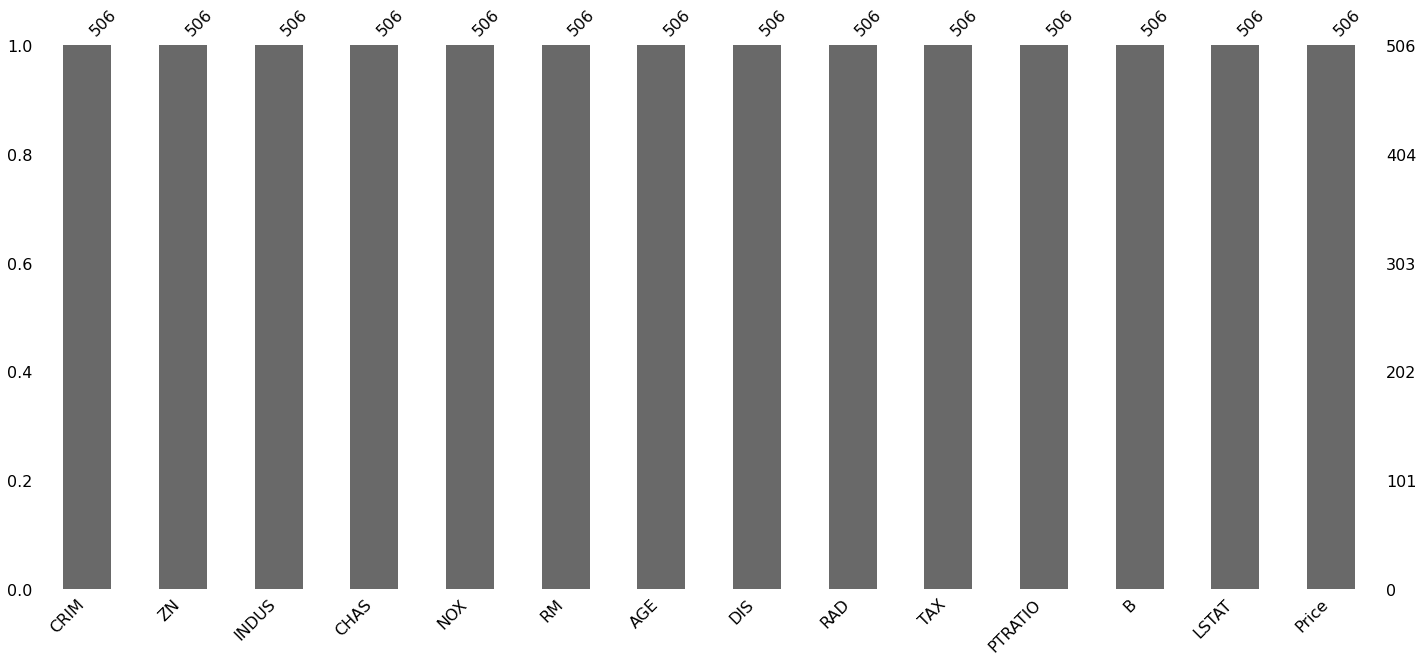

In [4]:
sns.heatmap(df.corr())
df.shape
df.isna().sum()
import missingno as ms 
ms.bar(df)

In [5]:
#setting features and target

X=df.iloc[:,:-1]   #features
Y=df.iloc[:,-1]    #target


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57
205,0.13642,0.0,10.59,0.0,0.489,5.891,22.3,3.9454,4.0,277.0,18.6,396.90,10.87
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
338,0.03306,0.0,5.19,0.0,0.515,6.059,37.3,4.8122,5.0,224.0,20.2,396.14,8.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41


In [7]:
# calulating error for the linear regression model
#from sklearn import linear_model
#model= linear_model.LinearRegression()
#model.fit(X_train, Y_train)
#pred=model4.predict(X_test)
#from sklearn.metrics import mean_squared_error
#errors = mean_squared_error(Y_test, pred, squared=False)
# report error
#print(errors)

In [8]:
# Wrapper Method

In [7]:
#Forward Selection
import mlxtend
from mlxtend.frequent_patterns import association_rules
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X_train, Y_train)
all=sfs.k_feature_names_     # to get the final set of features
all=np.array(all)
x_train=X_train[all]
x_test=X_test[all]
from sklearn import linear_model
model4= linear_model.LinearRegression()
model4.fit(x_train, Y_train)
pred1=model4.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred1, squared=False)
# report error
print(errors)

4.368323994900285


In [8]:
#using on test dataset

#import statistics as st

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#model1 = DecisionTreeClassifier()
#model2 = KNeighborsClassifier()
#model3= LogisticRegression()
#from sklearn import linear_model
#model4= linear_model.LinearRegression()
#model4.fit(x_train, Y_train)


#model1.fit(X_train,Y_train)
#model2.fit(X_train,Y_train)
#model3.fit(X_train,Y_train)

#pred1=model1.predict(X_test)
#pred2=model2.predict(X_test)
#pred3=model3.predict(X_test)
#pred4=model4.predict(x_test)

#finalpred=(pred4)
#finalpred

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# 2.Backward Elimination

sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X_train, Y_train)
all2=sbs.k_feature_names_
all2=np.array(all2)
x_train=X_train[all2]
x_test=X_test[all2]
from sklearn import linear_model
model4= linear_model.LinearRegression()
model4.fit(x_train, Y_train)
pred2=model4.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred2, squared=False)
# report error
print(errors)

4.368323994900285


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# 3.Bi-directional Elimination

sffs = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X_train, Y_train)
all3=sffs.k_feature_names_
all3=np.array(all3)
x_train=X_train[all3]
x_test=X_test[all3]
from sklearn import linear_model
model4= linear_model.LinearRegression()
model4.fit(x_train, Y_train)
pred3=model4.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred3, squared=False)
# report error
print(errors)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4.368323994900285


In [11]:
# Filter Method
# 1)Removing Constant Features using VarianceThreshold



from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
#Fit and transforming on train data
data_constant = constant_filter.fit_transform(X_train)
print(data_constant.shape)
#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
#No. of constant columns
print(len(constant_columns))
#Constant columns names:
for column in constant_columns:
    print(column)

(379, 13)
0


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#Removing the above-identified constant columns from our dataset
df1 = df.drop(constant_columns,axis=1)
df1.shape

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(506, 14)

In [13]:
# 2)Removing Quasi-Constant Features
qcons_filter = VarianceThreshold(threshold=0.01)
#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(X_train)
print(data_qcons.shape)
#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in X_train.columns
                    if column not in X_train.columns[qcons_filter.get_support()]]
#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(379, 13)
0


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#Removing above-identified quasi constant columns from our dataset
df1 = df1.drop(qcons_columns,axis=1)
df1.shape

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(506, 14)

In [15]:
# 3)Removing Duplicate Columns
# Transposing dataset
df1_t = df1.T
df1_t.shape
#duplicacy in columns
print(df1_t.duplicated().sum())
#Dropping Duplicated method using drop_duplicates()
df1_dup = df1_t.drop_duplicates(keep='first').T
df1_dup.shape

0


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(506, 14)

In [16]:
# 4)Correlation of Features with the Target Variable
#removing features with low correlation

corr_matrix=df1.corr()
cor=corr_matrix["Price"]
cor
df1.columns


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


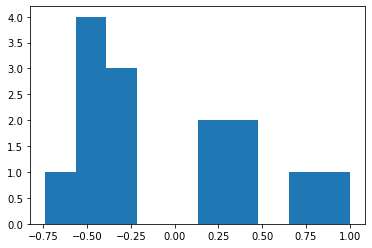

In [17]:
#Plotting for visualization
import matplotlib.pyplot as plt
plt.hist(cor)
plt.show()

In [18]:
# removing features with low correlation
for i in range(len(cor)):
    if np.abs(cor[i])<0.4:
        print(df1.iloc[0,i])
        print(df1.columns[i])

#df1.shape
df1=df1.drop(["CRIM","ZN","CHAS","AGE","DIS","RAD","B"],axis=1);
df1.shape



0.00632
CRIM
18.0
ZN
0.0
CHAS
65.2
AGE
4.09
DIS
1.0
RAD
396.9
B


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(506, 7)

In [19]:
# 5) Correlation with other variables
for i in range(0,len(df1.columns)):
    for j in  range(0,len(df1.columns)):
        if i!=j:
            corr_1=np.abs(df1[df1.columns[i]].corr(df1[df1.columns[j]]))
            if corr_1 <0.3:
                print( df1.columns[i] , " is not correlated  with ", df1.columns[j])
            elif corr_1>0.75:
                print( df1.columns[i] , " is highly  correlated  with ", df1.columns[j])


INDUS  is highly  correlated  with  NOX
NOX  is highly  correlated  with  INDUS
NOX  is not correlated  with  PTRATIO
RM  is not correlated  with  TAX
TAX  is not correlated  with  RM
PTRATIO  is not correlated  with  NOX


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Drop highly correlated features

df1= df1.drop(['NOX'], axis=1)
df1.shape

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(506, 6)

In [21]:
# features from filter method
all=df1.iloc[:,:-1]
x_train=X_train[all.columns]
x_test=X_test[all.columns]
from sklearn import linear_model
model= linear_model.LinearRegression()
model.fit(x_train, Y_train)
pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred, squared=False)
# report error
print(errors)

4.884111448697225


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Embeded Methods
#LASSO
#from sklearn.linear_model import LassoCV
#from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=10)
#lasso = LassoCV(cv=skf, random_state=42).fit(X_train,Y_train)
#print('Selected Features:', list(boston.feature_names[np.where(lasso.coef_!=0)[0]]))
#LASSO require not contineous values

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
